<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Notebook-to-analyse-the-strategy" data-toc-modified-id="Notebook-to-analyse-the-strategy-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Notebook to analyse the strategy</a></span></li><li><span><a href="#Analysis-of-performance-accross-periods" data-toc-modified-id="Analysis-of-performance-accross-periods-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Analysis of performance accross periods</a></span><ul class="toc-item"><li><span><a href="#Risk-Analysis" data-toc-modified-id="Risk-Analysis-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Risk Analysis</a></span></li><li><span><a href="#Drawdown-Analysis" data-toc-modified-id="Drawdown-Analysis-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Drawdown Analysis</a></span></li><li><span><a href="#Distribution-of-returns-of-buying-vs-shorting-the-market" data-toc-modified-id="Distribution-of-returns-of-buying-vs-shorting-the-market-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Distribution of returns of buying vs shorting the market</a></span></li><li><span><a href="#Returns-when-shorting-the-market" data-toc-modified-id="Returns-when-shorting-the-market-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Returns when shorting the market</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Conclusions</a></span></li></ul></li></ul></div>

## Notebook to analyse the strategy

In [10]:
import os
os.chdir("/Users/Sergio/Documents/Master_QF/Thesis/Code/Algorithmic Strategies")
%run Functions.ipynb

In [11]:
# Settings for notebook visualization
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from IPython.core.display import HTML
HTML("""<style>.output_png img {display: block;margin-left: auto;margin-right: auto;text-align: center;vertical-align: middle;} </style>""")
print("Settings imported correctly")

Settings imported correctly


In [12]:
# Necessary imports
from collections import namedtuple
import pandas as pd
import quantstats as qs
print("Libraries imported correctly")

Libraries imported correctly


In [13]:
# Settings for plot visualization
qs.extend_pandas()
plt.rcParams['figure.figsize'] = (20,6) # (26,12)

for_github = False
if for_github:
    color = 'k' # Color for GitHub
    plt.rcParams['legend.facecolor'] = 'w'# Color for GitHub
else:
    color = 'w' # Color for me
    plt.rcParams['legend.facecolor'] = '#2f3540' # Color for me

plt.rcParams['text.color'] = color
plt.rcParams['xtick.color'] = color
plt.rcParams['ytick.color'] = color
plt.rcParams['axes.labelcolor'] = color

SMALL_SIZE = 13
MEDIUM_SIZE = 15
BIG_SIZE = 17
plt.rcParams['font.size'] = SMALL_SIZE
plt.rcParams['axes.titlesize'] = BIG_SIZE
plt.rcParams['axes.labelsize'] = MEDIUM_SIZE
plt.rcParams['xtick.labelsize'] = MEDIUM_SIZE
plt.rcParams['ytick.labelsize'] = MEDIUM_SIZE
plt.rcParams['legend.fontsize'] = SMALL_SIZE
plt.rcParams['figure.titlesize'] = BIG_SIZE

np.set_printoptions(edgeitems=40, linewidth=1000)

pd.set_option("display.precision", 6)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
print("Notebook parameters set correctly")

Notebook parameters set correctly


In [15]:
df = pd.read_csv("data/Strategy returns.csv", parse_dates=True, index_col=0)

df.head(1)
df.tail(1)

,Close,Market_daily_ret,Strat_daily_ret,Strat_position,Long_only,Costs,Market_cum_ret,Strat_cum_ret
1953-01-02,26.540001,-0.001129,-0.000112,1,0,0.000112,99.887095,99.988846


,Close,Market_daily_ret,Strat_daily_ret,Strat_position,Long_only,Costs,Market_cum_ret,Strat_cum_ret
2020-09-03,3455.060059,-0.035126,-0.035237,0,0,0.000112,13003.613467,40655.33714


## Analysis of performance accross periods

In [16]:
names = ['1953-1959', '1960-1982', '1983-1999', '2000-2002', '2003-2020', '2020-2020']
ini = ['1953', '1960', '1983', '2000', '2003', '2020']
end = ['1959', '1982', '1999', '2002', '2019', '2020']
periods = []

PeriodDataTuple = namedtuple('Data', ["name", "df"])

for i in range(len(ini)):
    periods.append(PeriodDataTuple(names[i], df.loc[ini[i]:end[i]].copy()))

periods[0].name
periods[0].df.iloc[[0,-1]]

# print("SR:")
# for p in periods:
#     print(p.name + ": {:.2f}".format(p.df['Strat_daily_ret'].sharpe()))

'1953-1959'

,Close,Market_daily_ret,Strat_daily_ret,Strat_position,Long_only,Costs,Market_cum_ret,Strat_cum_ret
1953-01-02,26.540001,-0.001129,-0.000112,1,0,0.000112,99.887095,99.988846
1959-12-31,59.889999,0.002008,0.002008,1,0,0.000000,225.404592,183.600288


### Risk Analysis

In [23]:
%run Functions.ipynb

# Ann_ret (%), STDEV, SR, MAX_DD, risk_of_ruin, VAR(90%), VAR(95%), VAR(99%), expected_shortfall, outlier_win_ratio, outlier_loss_ratio, recovery_factor, information_ratio

ann_rets = [9.07, 14.27, 11.59, -7.73, 3.57, 5.38]
col_data = pd.Series(index=names, data=ann_rets)
risk_metrics = pd.DataFrame(data=col_data, index=names, columns=['Ann_ret (%)'])

ann_rets_sp = [12.31, 3.78, 14.8, -15.71, 7.17, -5.33]
col_data = pd.Series(index=names, data=ann_rets_sp, name="SP500 ret (%)")
risk_metrics = pd.concat([risk_metrics,col_data], axis=1)

# col_data = pd.Series(index=names, data=[p.df['Strat_daily_ret'].std() for p in periods], name="ST_DEV")
# risk_metrics = pd.concat([risk_metrics,col_data], axis=1)

col_data = pd.Series(index=names, data=[p.df['Strat_daily_ret'].sharpe() for p in periods], name="SR")
risk_metrics = pd.concat([risk_metrics,col_data], axis=1)

col_data = pd.Series(index=names, data=[p.df['Strat_daily_ret'].max_drawdown() for p in periods], name="Max_DD")
risk_metrics = pd.concat([risk_metrics,col_data], axis=1)

col_data = pd.Series(index=names, data=[p.df['Strat_daily_ret'].risk_of_ruin() for p in periods], name="Risk_of_ruin")
risk_metrics = pd.concat([risk_metrics,col_data], axis=1)

col_data = pd.Series(index=names, data=[p.df['Strat_daily_ret'].value_at_risk(confidence=0.90) for p in periods], name="VAR(90%)")
risk_metrics = pd.concat([risk_metrics,col_data], axis=1)
col_data = pd.Series(index=names, data=[p.df['Strat_daily_ret'].value_at_risk(confidence=0.95) for p in periods], name="VAR(95%)")
risk_metrics = pd.concat([risk_metrics,col_data], axis=1)
col_data = pd.Series(index=names, data=[p.df['Strat_daily_ret'].value_at_risk(confidence=0.99) for p in periods], name="VAR(99%)")
risk_metrics = pd.concat([risk_metrics,col_data], axis=1)

col_data = pd.Series(index=names, data=[p.df['Strat_daily_ret'].expected_shortfall() for p in periods], name="Expected_shortfall")
risk_metrics = pd.concat([risk_metrics,col_data], axis=1)

col_data = pd.Series(index=names, data=[p.df['Strat_daily_ret'].outlier_win_ratio() for p in periods], name="Outlier_win_ratio")
risk_metrics = pd.concat([risk_metrics,col_data], axis=1)
col_data = pd.Series(index=names, data=[p.df['Strat_daily_ret'].outlier_loss_ratio() for p in periods], name="Outlier_loss_ratio")
risk_metrics = pd.concat([risk_metrics,col_data], axis=1)

col_data = pd.Series(index=names, data=[p.df['Strat_daily_ret'].recovery_factor() for p in periods], name="Recovery_factor")
risk_metrics = pd.concat([risk_metrics,col_data], axis=1)

col_data = pd.Series(index=names, data=[p.df['Strat_daily_ret'].information_ratio(
    benchmark=p.df['Market_daily_ret']) for p in periods],
    name="Information_ratio")
risk_metrics = pd.concat([risk_metrics,col_data], axis=1)

risk_metrics

#risk_metrics.round(5).to_excel('Risk_metrics.xlsx')

,Ann_ret (%),SP500 ret (%),SR,Max_DD,Risk_of_ruin,VAR(90%),VAR(95%),VAR(99%),Expected_shortfall,Outlier_win_ratio,Outlier_loss_ratio,Recovery_factor,Information_ratio
1953-1959,9.07,12.31,1.114961,-0.133392,0.000000e+00,-0.006169,-0.008019,-0.011490,-0.012756,5.183199,3.492764,6.267275,-0.025272
1960-1982,14.27,3.78,1.618982,-0.141408,0.000000e+00,-0.006311,-0.008255,-0.011901,-0.012866,7.404844,4.183931,144.855172,0.062049
1983-1999,11.59,14.80,0.858675,-0.333419,0.000000e+00,-0.010729,-0.013905,-0.019862,-0.022528,4.671014,3.789504,16.334358,-0.027130
2000-2002,-7.73,-15.71,-0.305582,-0.349545,0.000000e+00,-0.014546,-0.018608,-0.026229,-0.025845,6.514426,2.828585,-0.539239,0.037565
2003-2020,3.57,7.17,0.303268,-0.512266,0.000000e+00,-0.011858,-0.015271,-0.021672,-0.025712,5.323000,4.134012,1.529868,-0.029853
2020-2020,5.38,-5.33,0.835878,-0.091775,5.878024e-87,-0.015415,-0.019972,-0.028521,-0.033311,5.565277,4.303226,1.140087,-0.002384


### Drawdown Analysis

In [18]:
#sort_values(by=['days'], axis=1)
qs.stats.drawdown_details(html_df.loc['2020', 'Strat_daily_ret']).sort_values(by='days', ascending=False)

NameError: name 'html_df' is not defined

### Distribution of returns of buying vs shorting the market

In [19]:
highest = max(np.abs(df['Market_daily_ret'].min()), df['Market_daily_ret'].max()).round(2)
lowest = -highest
bins = np.arange(lowest, highest, 0.01)
bins.round(3)

array([-0.2 , -0.19, -0.18, -0.17, -0.16, -0.15, -0.14, -0.13, -0.12, -0.11, -0.1 , -0.09, -0.08, -0.07, -0.06, -0.05, -0.04, -0.03, -0.02, -0.01,  0.  ,  0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,  0.09,  0.1 ,  0.11,  0.12,  0.13,  0.14,  0.15,  0.16,  0.17,  0.18,  0.19])

<AxesSubplot:title={'center':'Strat_daily_ret when buying the market (Strat_position=1)'}, ylabel='Frequency'>

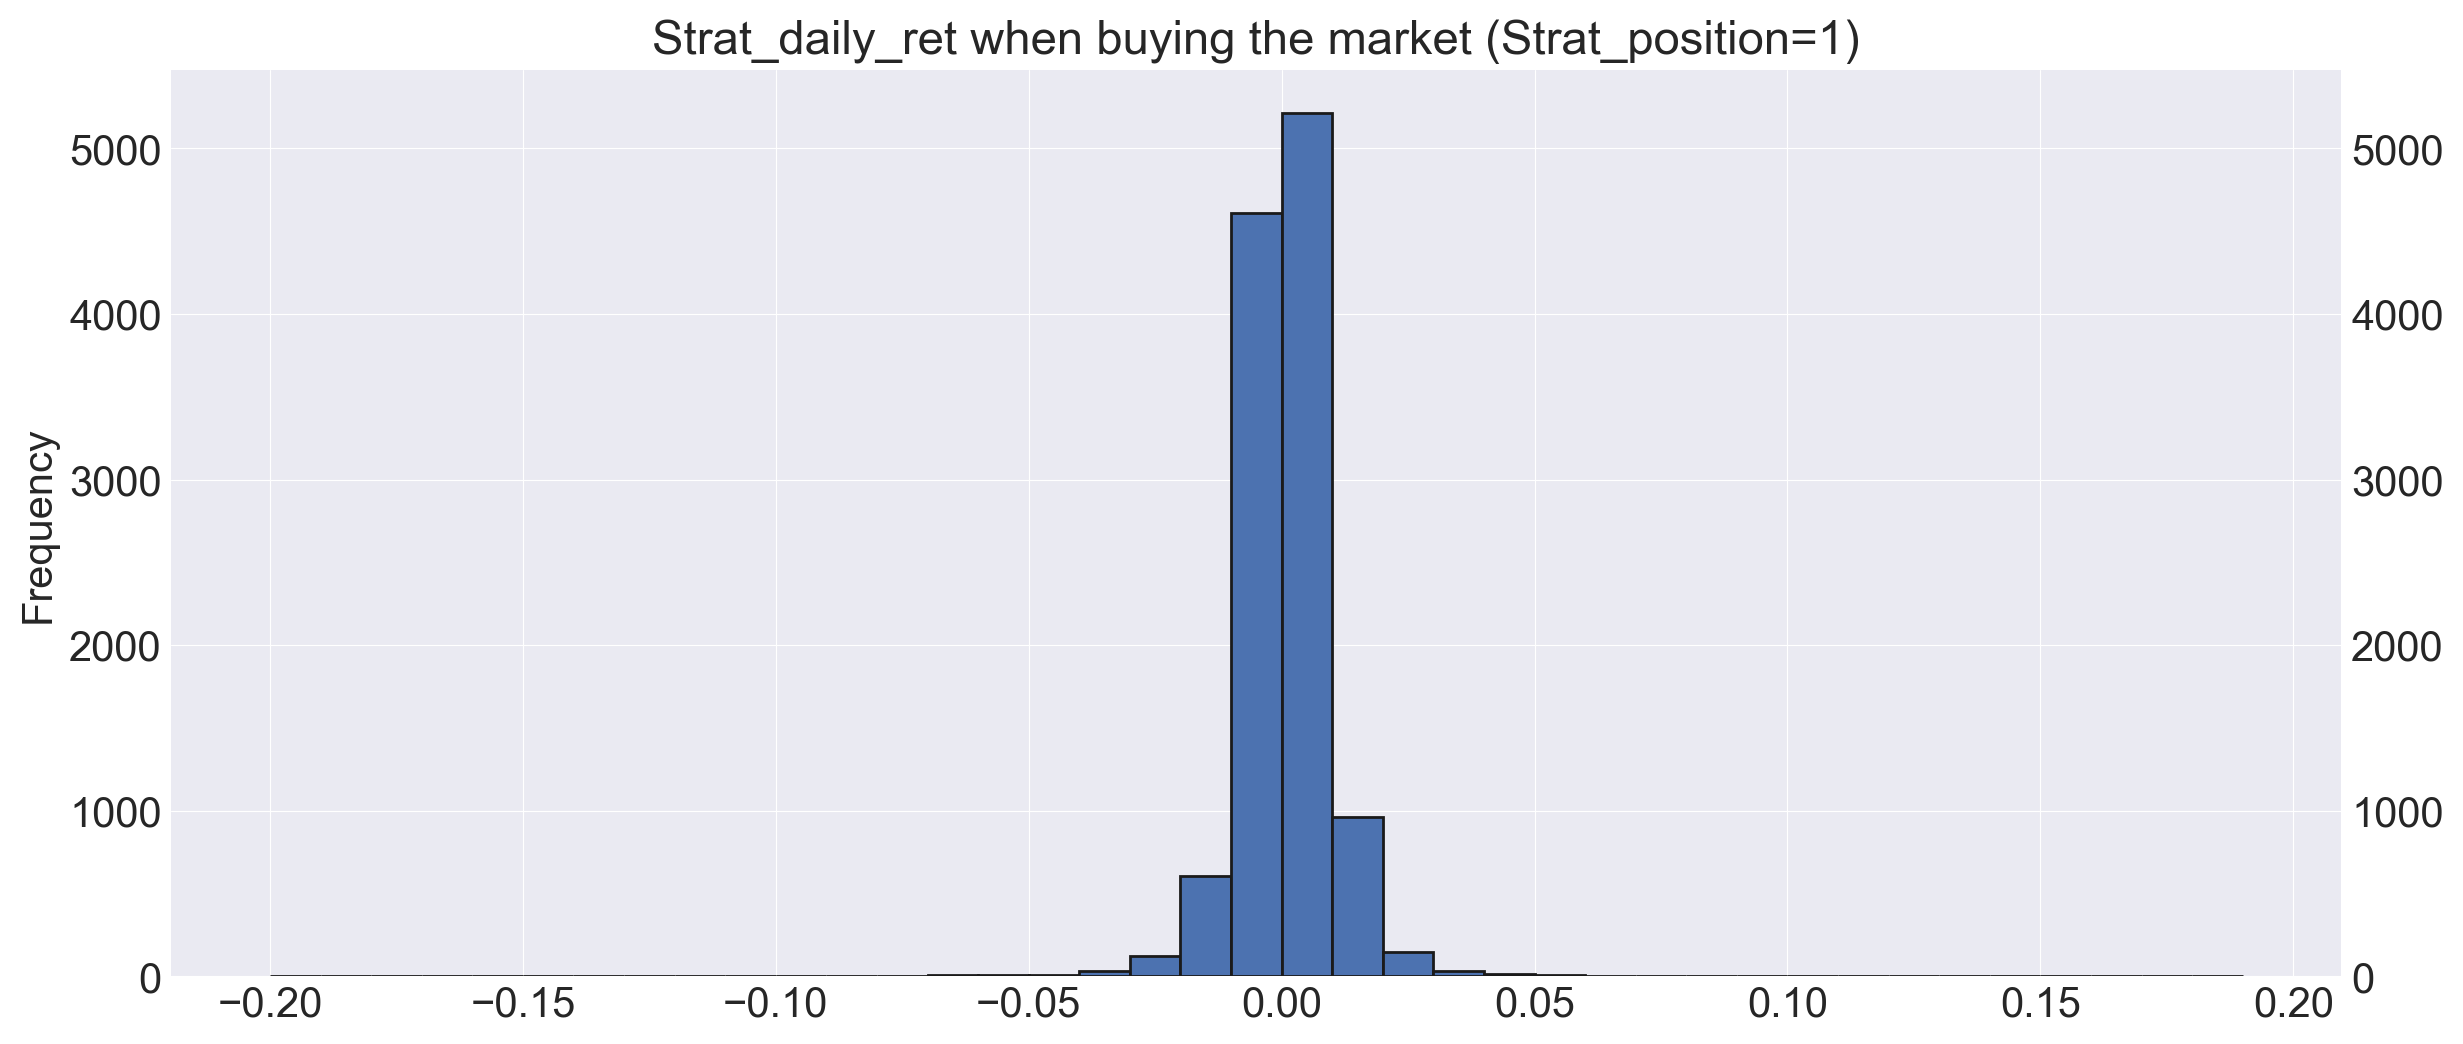

<AxesSubplot:title={'center':'Strat_daily_ret when shorting the market (Strat_position=-1)'}, ylabel='Frequency'>

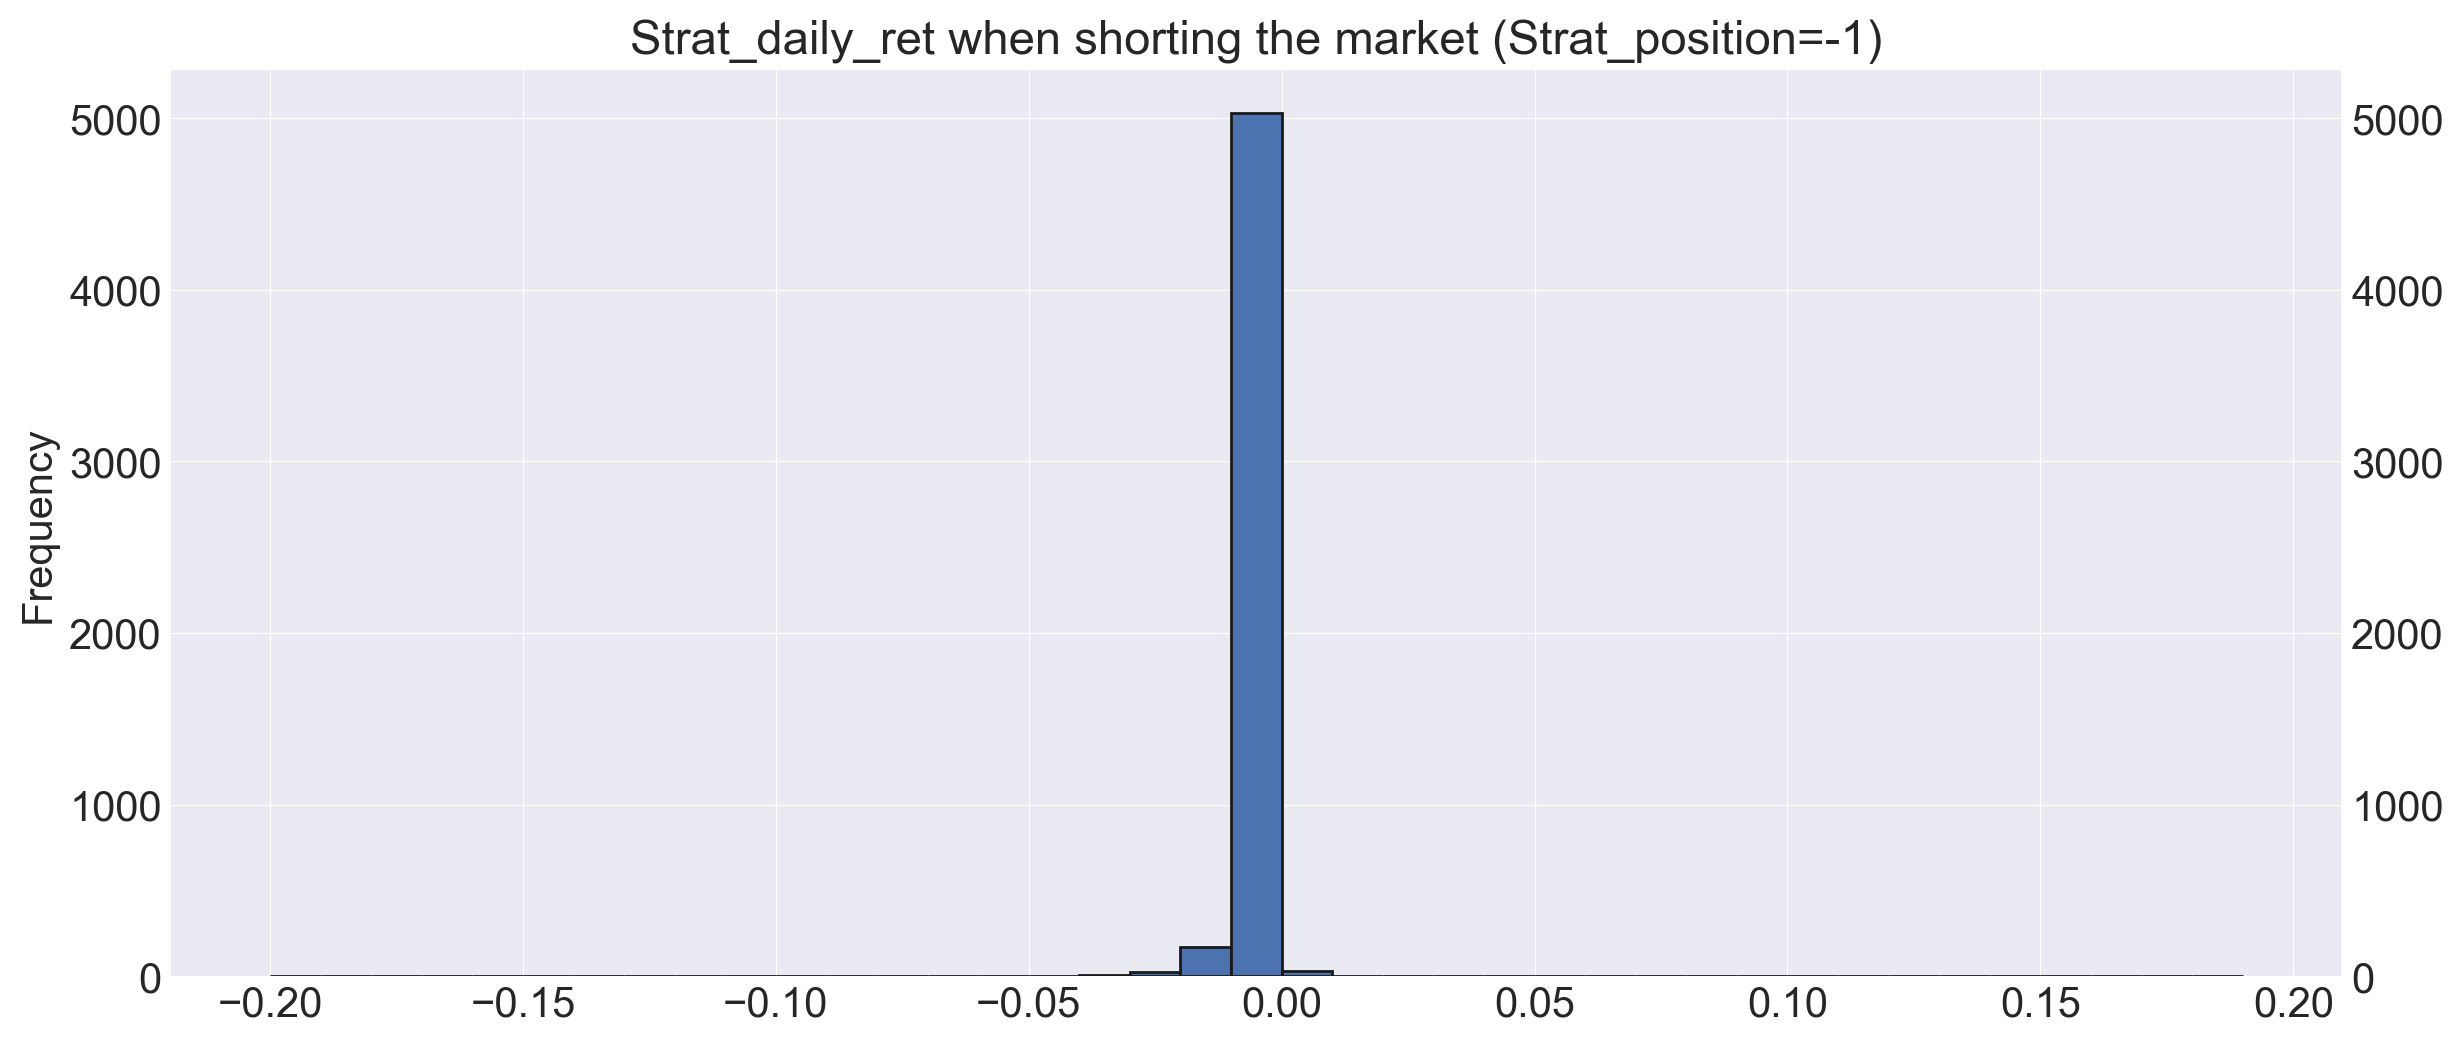

In [20]:
groups = df.groupby('Strat_position')
groups.get_group(1)['Strat_daily_ret'].plot(kind='hist', bins=bins, figsize=(14,6), title="Strat_daily_ret when buying the market (Strat_position=1)")
plt.show()
groups.get_group(0)['Strat_daily_ret'].plot(kind='hist', bins=bins, figsize=(14,6), title="Strat_daily_ret when shorting the market (Strat_position=-1)")

<AxesSubplot:title={'center':'Strategy Postition and costs'}>

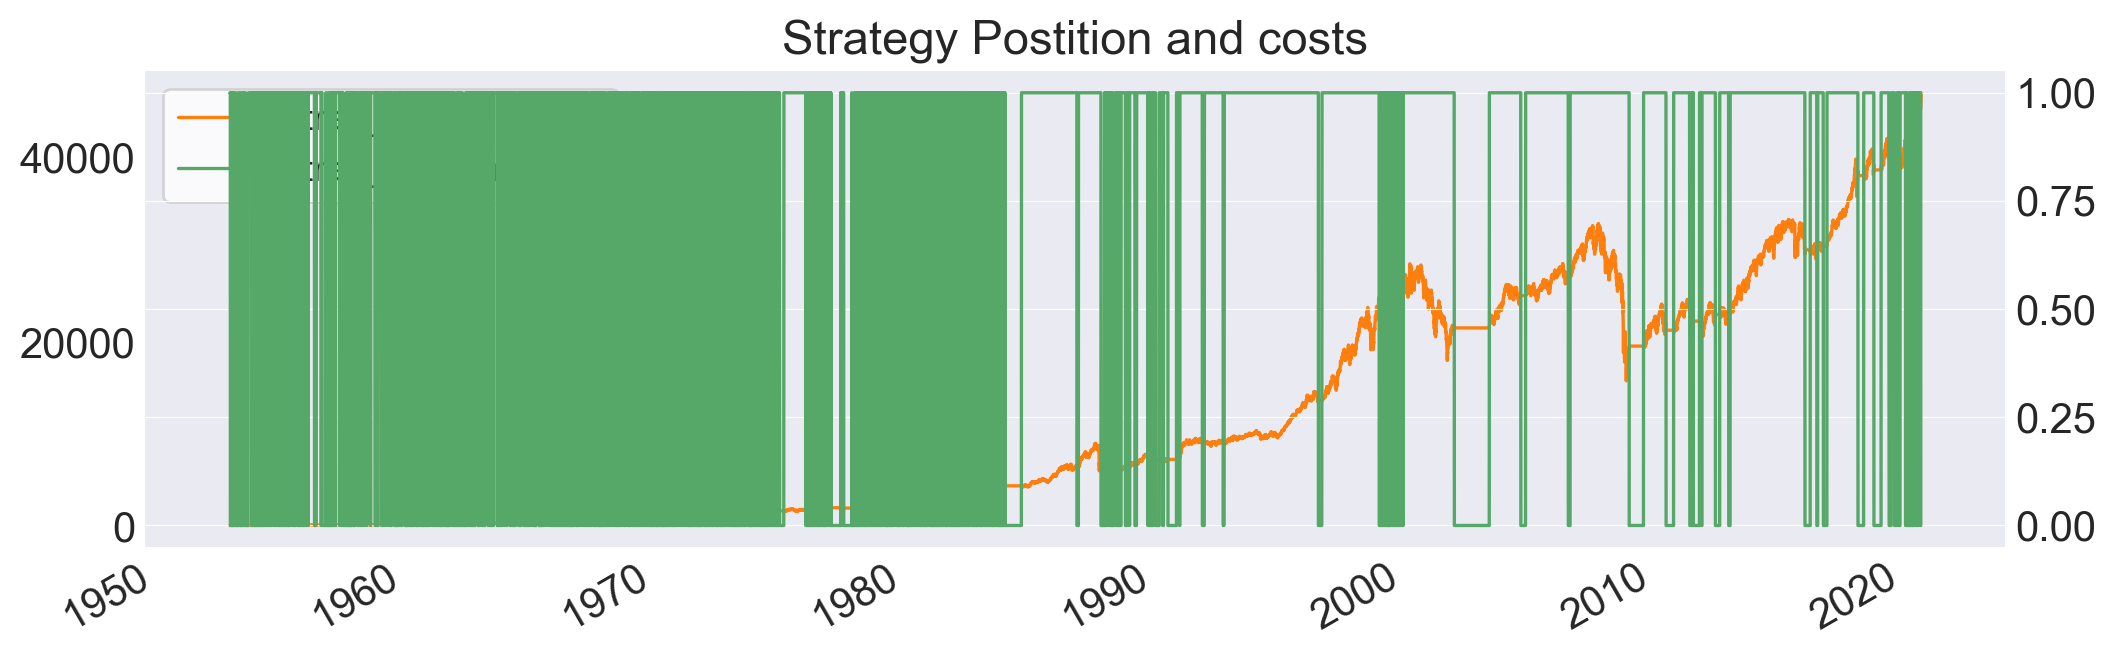

In [21]:
ini_equity = 100
df_short = df.loc[: ,['Close', 'Market_daily_ret', 'Strat_position', 'Costs']].copy()
df_short['Strat_position'].replace({-1:0}, inplace=True)
df_short['Costs'] = df_short['Costs'].div(2) 

first_day = str(df_short.index.min())


df_short['Strat_daily_ret'] = df_short['Market_daily_ret'].mul(df_short['Strat_position'].shift(1).fillna(0)).sub(df_short['Costs'])

df_short['Market_cum_ret'] = df_short['Market_daily_ret'].add(1).cumprod().mul(ini_equity)
df_short['Strat_cum_ret'] = df_short['Strat_daily_ret'].add(1).cumprod().mul(ini_equity)
df_short.loc[first_day, 'Market_cum_ret'] = ini_equity + df_short.loc[first_day, 'Market_daily_ret'] * ini_equity
df_short.loc[first_day, 'Strat_cum_ret'] = ini_equity + df_short.loc[first_day,'Strat_daily_ret'] * ini_equity

#df_short['1976-06-22':'1976-06']
df_short[['Strat_cum_ret', 'Strat_position']].plot(secondary_y=['Strat_position'], title='Strategy Postition and costs', color=['tab:orange', 'g'])

### Returns when shorting the market

<AxesSubplot:title={'center':'Strategy Postition = -1'}>

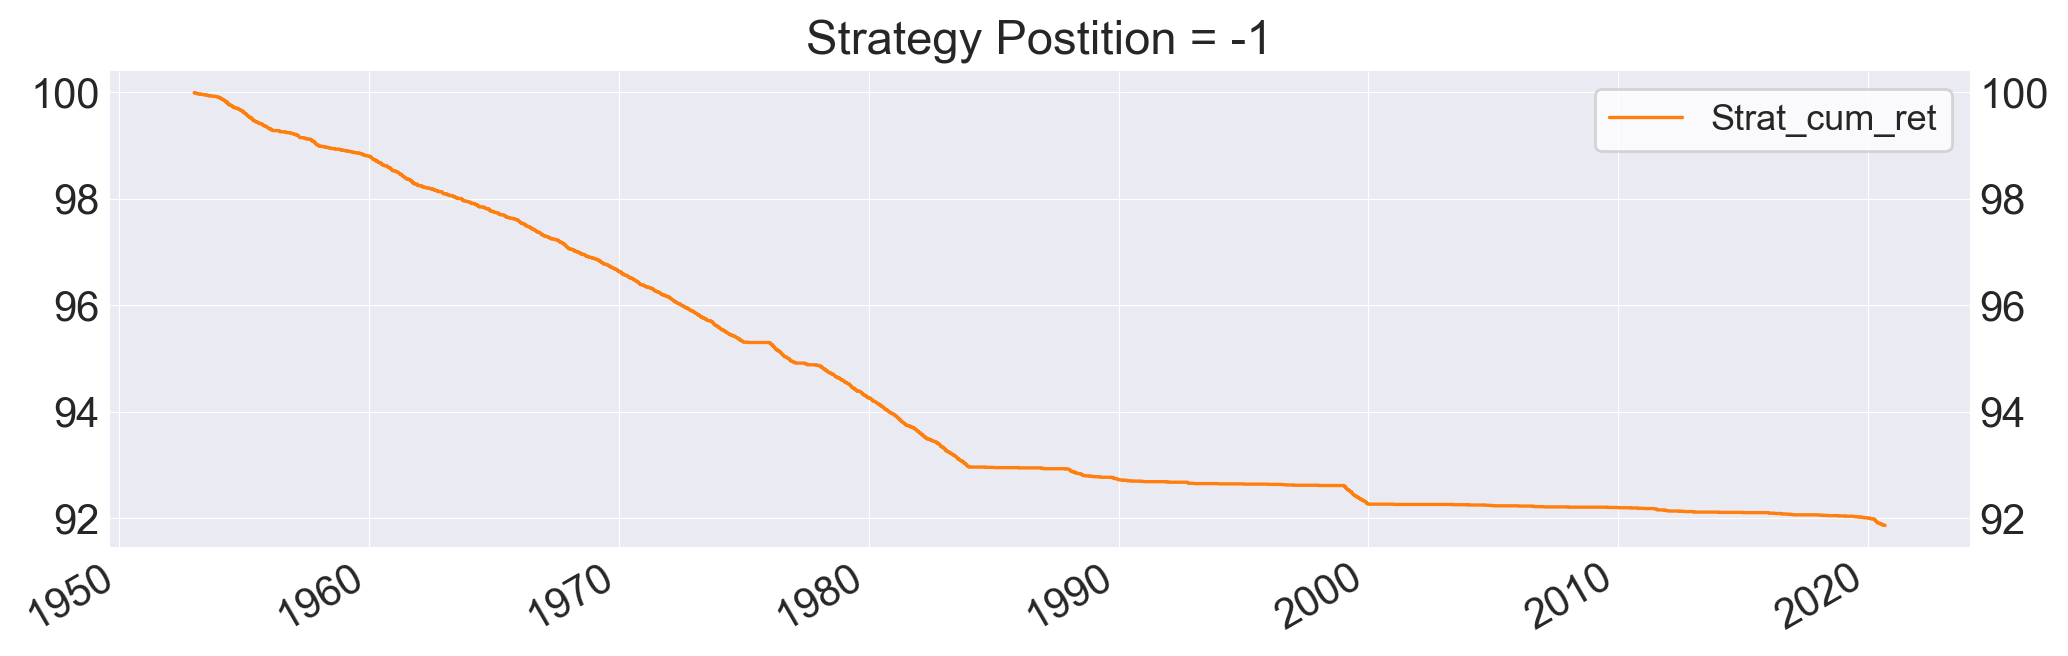

In [22]:
df_short = df.loc[: ,['Market_daily_ret', 'Strat_daily_ret', 'Strat_position', 'Market_cum_ret']].copy()
ini_equity = 100
first_day = str(df_short.index.min())

df_short = df.loc[: ,['Close', 'Market_daily_ret', 'Strat_position', 'Costs']].copy()
df_short['Strat_position'].replace({1:0}, inplace=True)
df_short['Costs'] = df_short['Costs'].div(2) 

df_short['Strat_daily_ret'] = df_short['Market_daily_ret'].mul(df_short['Strat_position'].shift(1).fillna(0)).sub(df_short['Costs'])

df_short['Market_cum_ret'] = df_short['Market_daily_ret'].add(1).cumprod().mul(ini_equity)
df_short['Strat_cum_ret'] = df_short['Strat_daily_ret'].add(1).cumprod().mul(ini_equity)
df_short.loc[first_day, 'Market_cum_ret'] = ini_equity + df_short.loc[first_day, 'Market_daily_ret'] * ini_equity
df_short.loc[first_day, 'Strat_cum_ret'] = ini_equity + df_short.loc[first_day,'Strat_daily_ret'] * ini_equity

#df_short[['Strat_cum_ret', 'Strat_position']].plot(subplots=['Strat_position'], title='Strategy Postition and costs', color=['tab:orange', 'g'])
df_short[['Strat_cum_ret']].plot(title='Strategy Postition = -1', color=['tab:orange'])

### Conclusions

- Shorting the market only works in the period 1973-1983. Year 2002 also delivers very good results. I don´t think it makes sense to keep this (increase of volatility, and no additional profits)
- This explains the results of the whole backtest:
    - Overperforming the benchmark in 1973-1983 and 2002.
    - (Mostly) Equal, or underperforming the rest of the years